In [2]:
import pandas as pd
import numpy as np
import haversine as hs 
import folium

In [3]:
Atm_user = pd.read_excel('User_location.xlsx')
atm_location = pd.read_excel('ATM_location.xlsx')


In [4]:
Atm_user.head(20)

,Users,Lat,Lon
0,User_9,18.041196,-77.494110
1,User_8,18.026886,-77.498142
2,User_7,18.036965,-77.509184
3,User_6,17.977800,-76.782500
4,User_5,18.003000,-76.789800
5,User_4,18.023300,-76.784000
6,User_3,18.086500,-76.726300
7,User_2,18.011700,-76.789400
8,User_1,18.019600,-76.779600
9,User_11,18.039539,-77.517159


In [5]:
Atm_user['coordinates']= list(zip(Atm_user.Lat,Atm_user.Lon))
atm_location['coordinates']= list (zip(atm_location.Lat, atm_location.Lon))

In [6]:
atm_location.tail(30)

,ATM,Lat,Lon,Functionality,coordinates
0,A,17.966098,-76.802680,Working,"(17.9660977, -76.8026803)"
1,B,18.030864,-76.776356,Not Working,"(18.0308636, -76.7763563)"
2,C,17.966139,-76.792167,Working,"(17.9661394, -76.7921671)"
3,D,18.015451,-76.796075,Not Working,"(18.0154509, -76.7960748)"
4,E,18.016340,-76.747458,Working,"(18.0163404, -76.747458)"
5,F,18.010563,-76.787224,Not Working,"(18.0105634207, -76.7872236348)"
6,G,18.011174,-76.787516,Working,"(18.0111737144, -76.7875162985)"
7,H,18.006460,-76.789480,Not Working,"(18.00646, -76.78948)"
8,I,18.179402,-76.451757,Working,"(18.1794021, -76.451757)"
9,J,18.235103,-76.656592,Working,"(18.2351034, -76.6565922)"


In [7]:
atm_locatio = atm_location[(atm_location.Functionality == 'Working')]
atm_locatio

,ATM,Lat,Lon,Functionality,coordinates
0,A,17.966098,-76.802680,Working,"(17.9660977, -76.8026803)"
2,C,17.966139,-76.792167,Working,"(17.9661394, -76.7921671)"
4,E,18.016340,-76.747458,Working,"(18.0163404, -76.747458)"
6,G,18.011174,-76.787516,Working,"(18.0111737144, -76.7875162985)"
8,I,18.179402,-76.451757,Working,"(18.1794021, -76.451757)"
9,J,18.235103,-76.656592,Working,"(18.2351034, -76.6565922)"
11,L,18.271174,-76.890437,Working,"(18.2711737, -76.8904369)"
14,O,18.467612,-77.305216,Working,"(18.4676119, -77.3052157)"
15,P,18.178354,-76.451051,Working,"(18.1783536, -76.451051)"
16,Q,18.039623,-77.507730,Working,"(18.0396231816928, -77.5077297697247)"


In [8]:
def location_from(user,atm):
  dist=hs.haversine(user,atm)
  return round(dist,2)

In [9]:
for _,row in atm_location.iterrows():
  Atm_user[row.ATM]= Atm_user['coordinates'].apply(lambda x: location_from(row.coordinates,x))

In [10]:
Atm_user.head()

,Users,Lat,Lon,coordinates,A,B,C,D,E,F,...,O,P,Q,R,S,T,U,V,W,X
0,User_9,18.041196,-77.494110,"(18.0411958721035, -77.4941104564363)",73.59,75.90,74.70,73.86,79.00,74.82,...,51.44,111.29,1.45,1.74,1.78,1.57,2.98,1.98,1.88,1.41
1,User_8,18.026886,-77.498142,"(18.0268856000495, -77.4981419532154)",73.86,76.32,74.97,74.25,79.39,75.20,...,53.07,111.94,1.74,1.75,1.90,2.38,1.37,1.74,1.79,1.56
2,User_7,18.036965,-77.509184,"(18.0369652860209, -77.509184373854)",75.13,77.49,76.23,75.44,80.58,76.40,...,52.51,112.93,0.33,0.13,0.29,1.02,2.77,0.32,0.23,0.26
3,User_6,17.977800,-76.782500,"(17.9778, -76.7825)",2.50,5.94,1.65,4.43,5.67,3.68,...,77.55,41.53,77.00,77.23,77.32,77.10,75.73,77.40,77.35,76.91
4,User_5,18.003000,-76.789800,"(18.003, -76.7898)",4.32,3.41,4.11,1.54,4.72,0.88,...,75.05,40.77,76.02,76.27,76.34,76.10,74.86,76.44,76.39,75.94


In [11]:
for _,row in atm_location.iterrows():
  Atm_user[row.ATM]= Atm_user['coordinates'].apply(lambda x: location_from(row.coordinates,x))


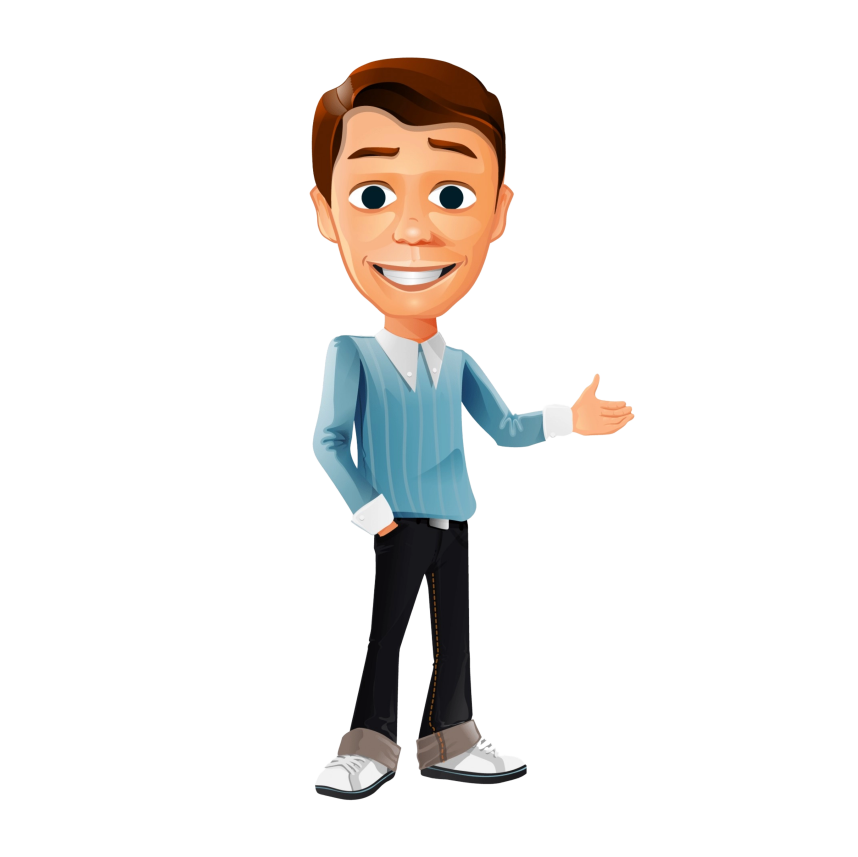
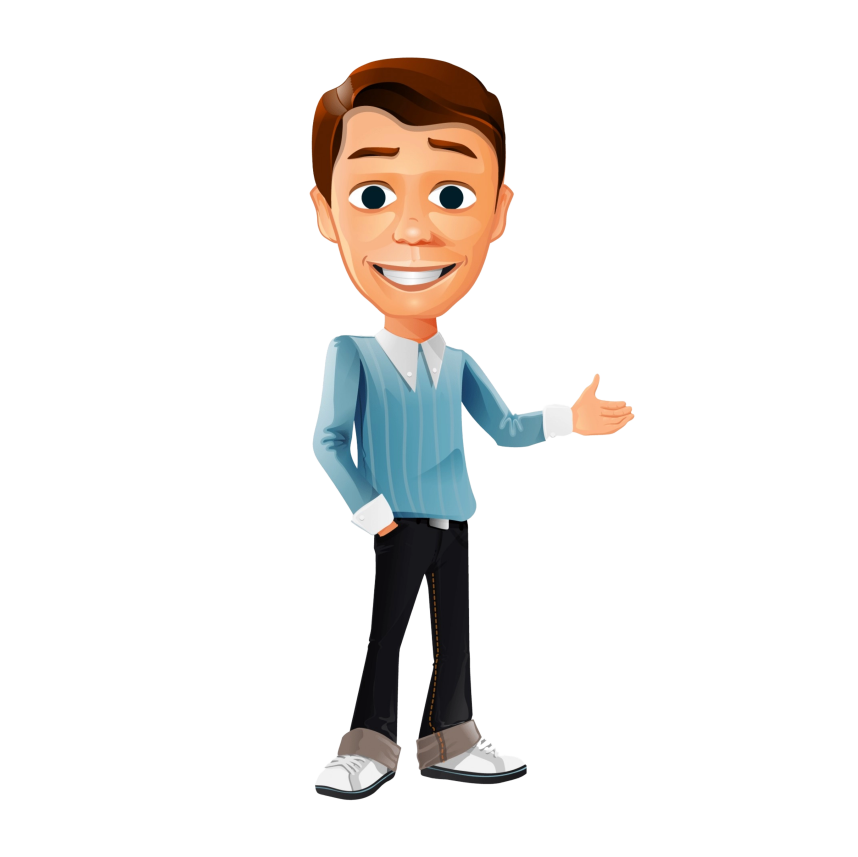
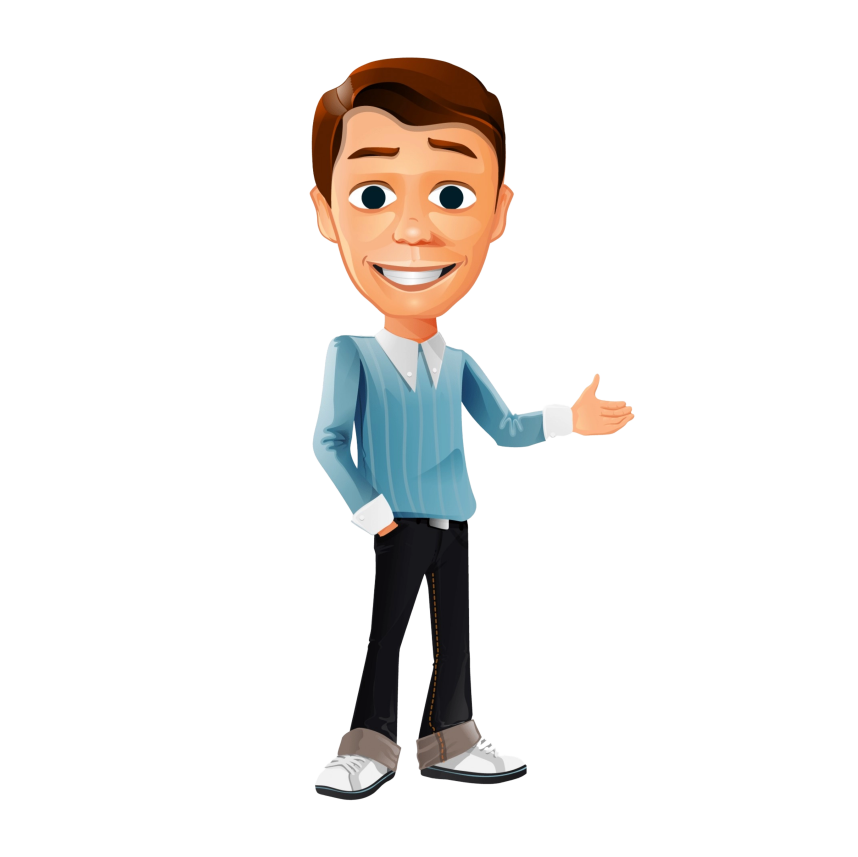
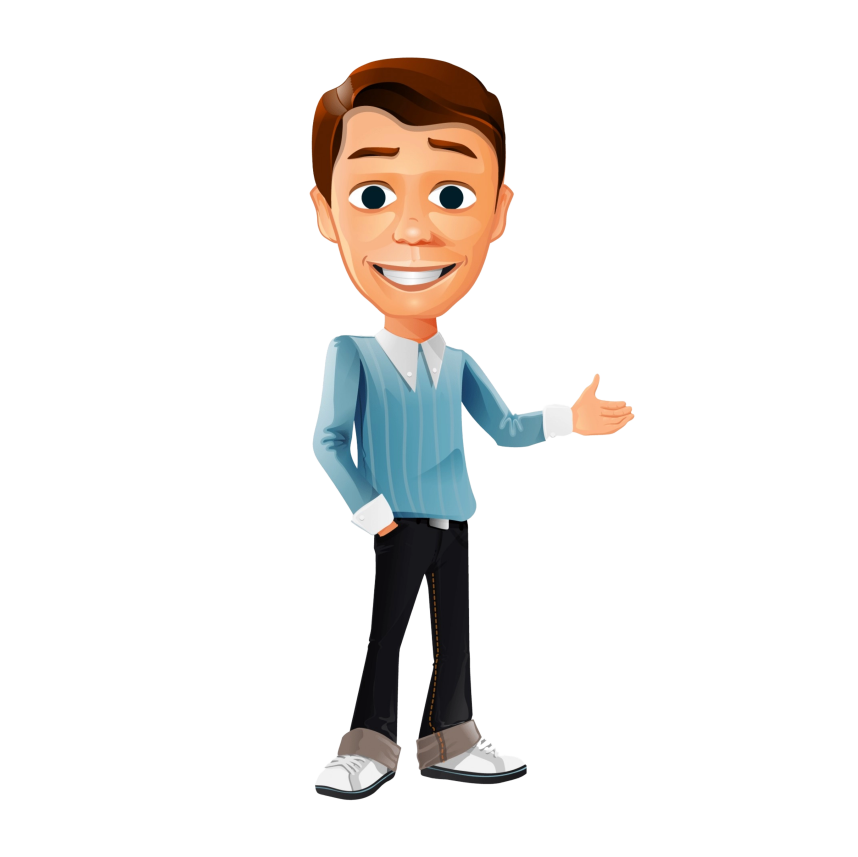
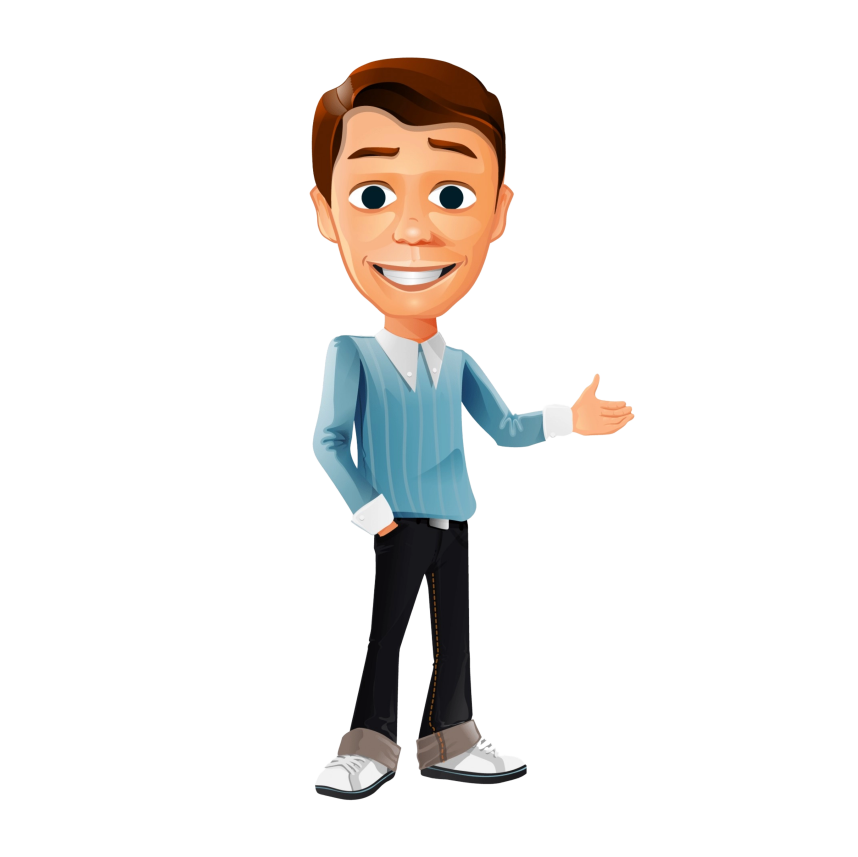
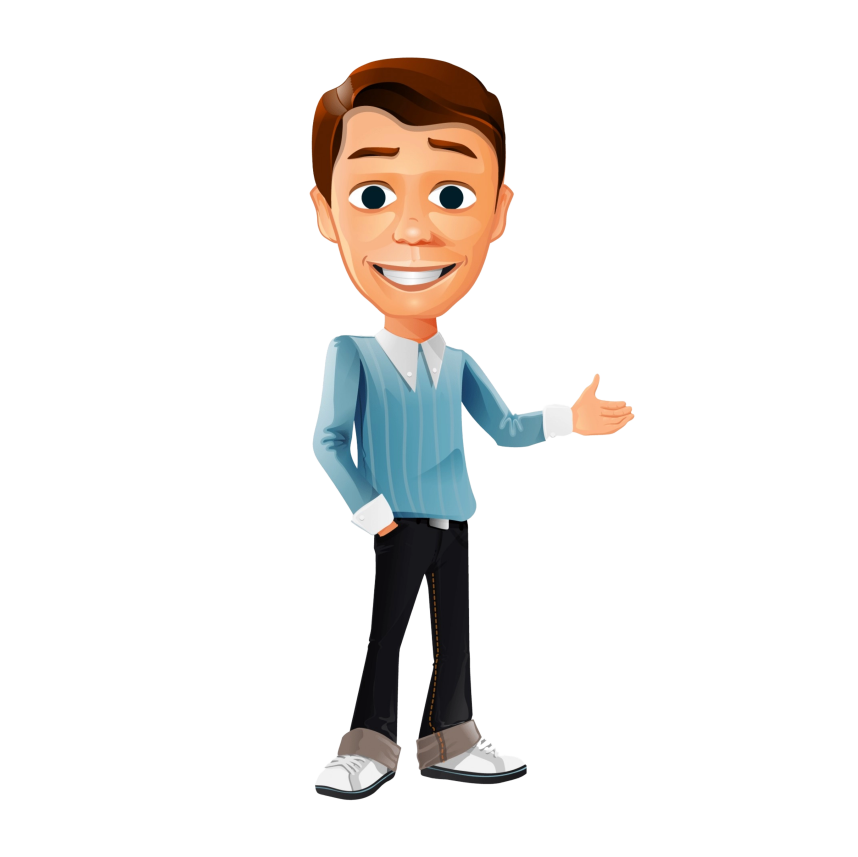
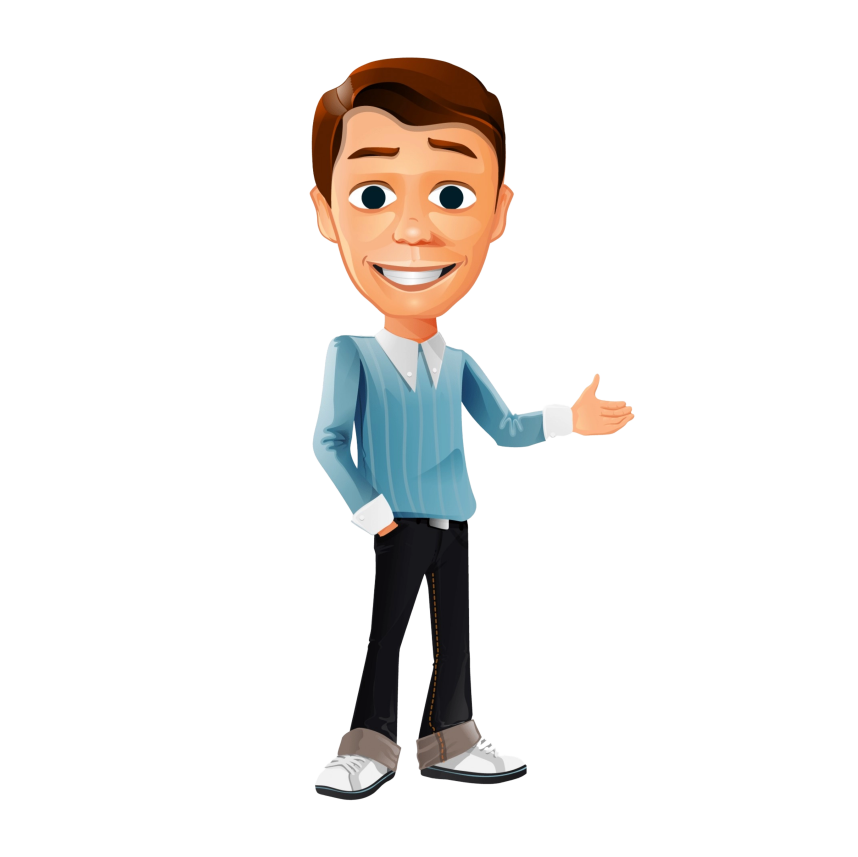
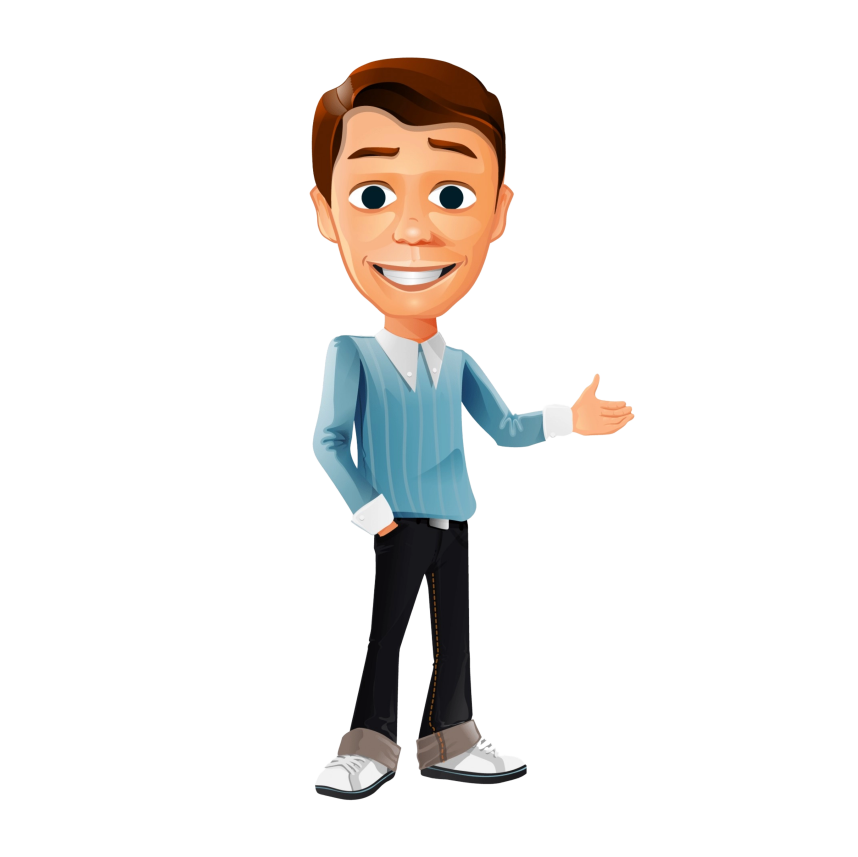
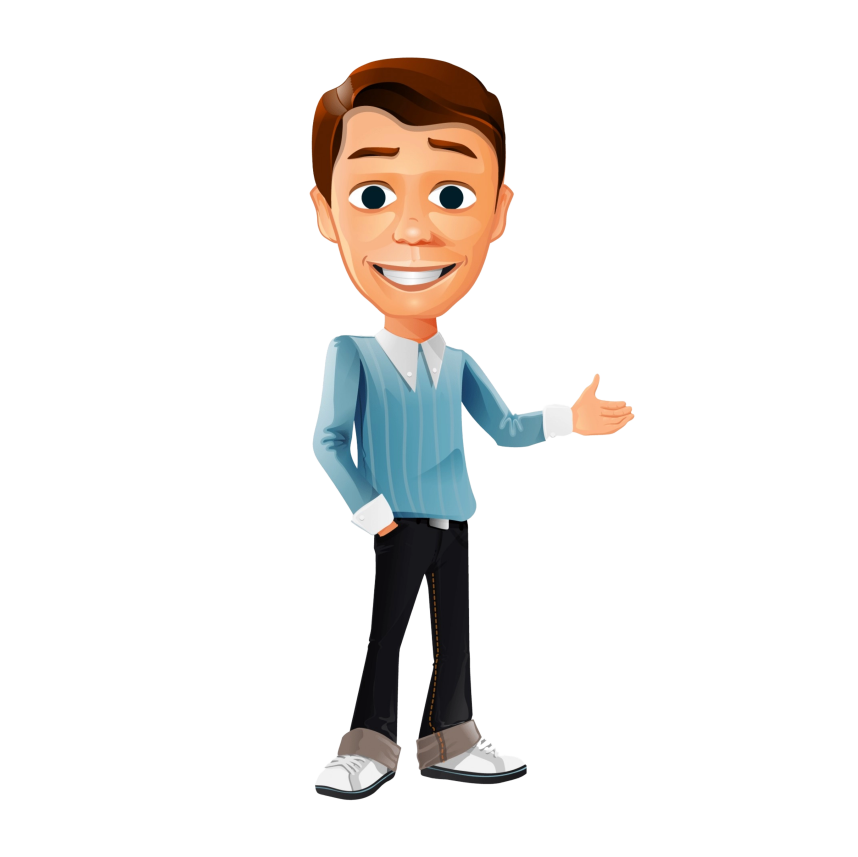
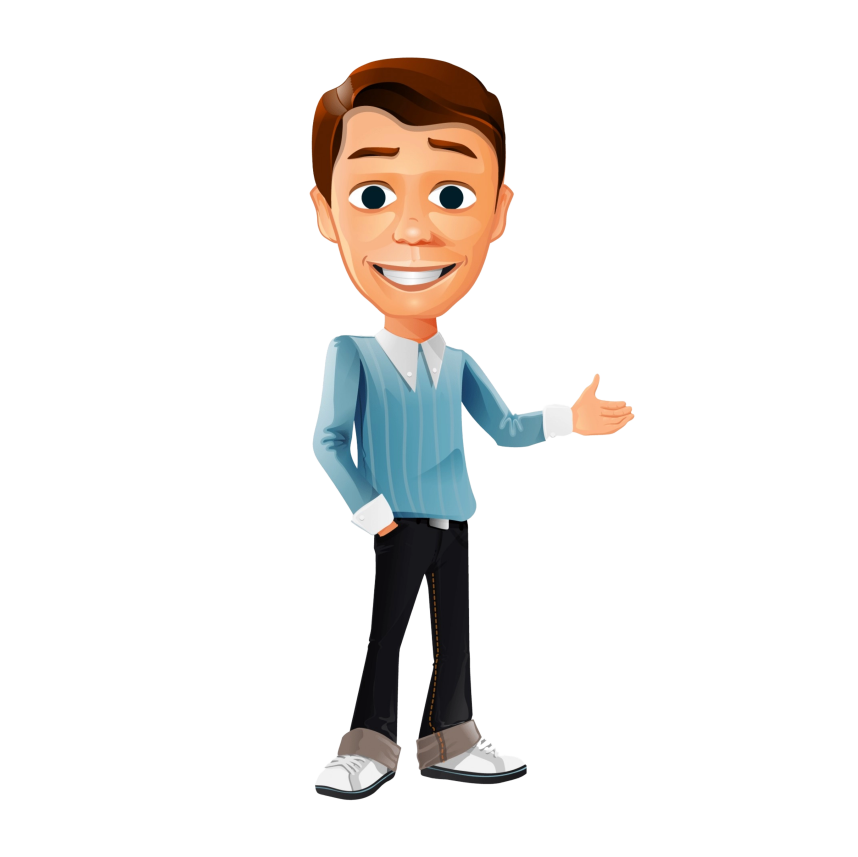
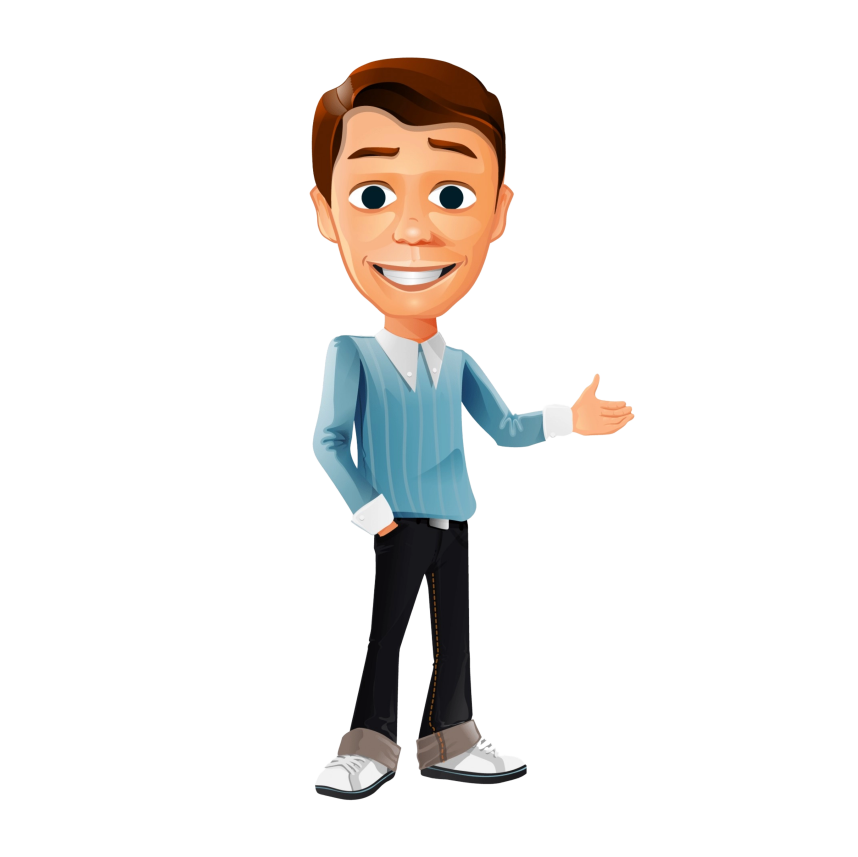
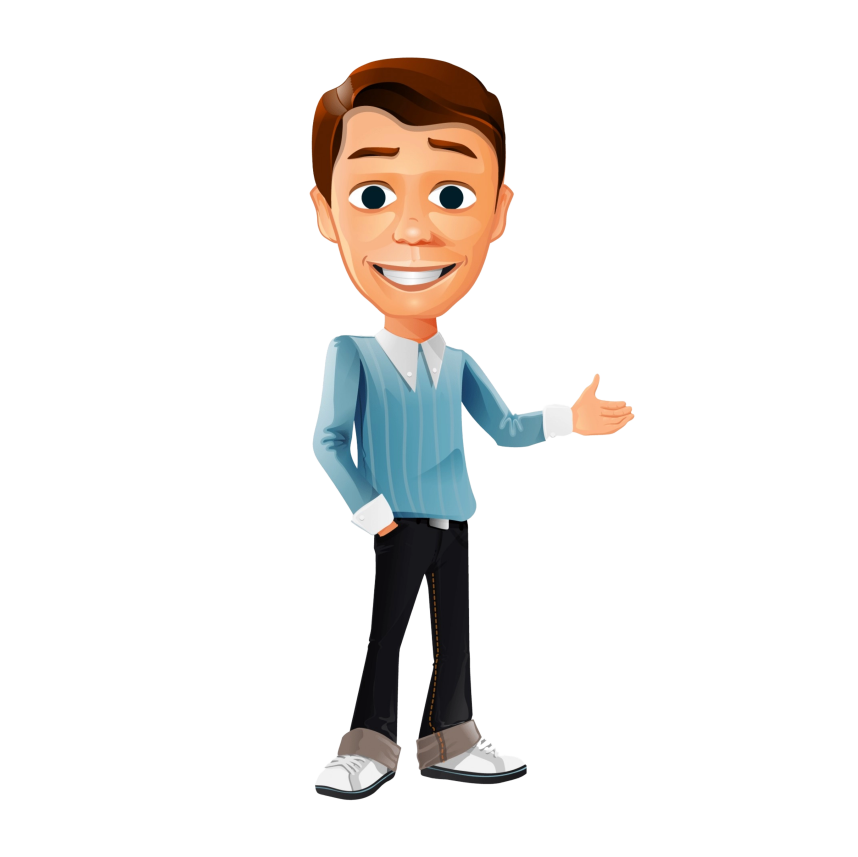

In [12]:

m=folium.Map(location=[18.0196,-76.7796], zoom_start=12, tiles='OpenStreetMap')
iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))

#Sample Kingston Users
folium.Marker(
    radius=200,
    location=[18.0196,-76.7796],
    popup="User_1",
    tooltip="User_1",
    icon=iconHuman,
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=200,
    location=[18.0117,-76.7894],
    popup="User_2",
    tooltip="User_2",
    icon=iconHuman,
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=200,
    location=[18.0865,-76.7263],
    popup="User_3",
    tooltip="User_3",
    icon=iconHuman,
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=50,
    location=[18.0233,-76.7840],
    popup="User_4",
    tooltip="User_4",
    icon=iconHuman,  
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=50,
    location=[18.0030,-76.7898],
    popup="User_5",
    tooltip="User_5",
    icon=iconHuman,  
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=100,
    location=[17.9778,-76.7825],
    popup="User_6",
    tooltip="User_6",
    icon=iconHuman,   
).add_to(m)

#Sample Mandeville Users
iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=100,
    location=[18.0388518287194,-77.5075944112819],
    popup="User_12",
    tooltip="User_12",
    icon=iconHuman,   
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=100,
    location=[18.0369652860209,-77.509184373854],
    popup="User_13",
    tooltip="User_13",
    icon=iconHuman,   
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=100,
    location=[18.0268856000495,-77.4981419532154],
    popup="User_14",
    tooltip="User_14",
    icon=iconHuman,   
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=100,
    location=[18.0411958721035,-77.4941104564363],
    popup="User_15",
    tooltip="User_15",
    icon=iconHuman,   
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=100,
    location=[18.0470151239093,-77.5141282652049],
    popup="User_16",
    tooltip="User_16",
    icon=iconHuman,   
).add_to(m)

iconHuman = folium.features.CustomIcon('human.png', icon_size=(60,60))
folium.Marker(
    radius=100,
    location=[18.0395390251431,-77.5171588018174],
    popup="User_17",
    tooltip="User_17",
    icon=iconHuman,   
).add_to(m)

#ATMS Modeled below
folium.Marker(
    location=[18.006460, -76.789480],
    popup="ATM H - Not Working",
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.006460, -76.789480],
    radius=10,
    popup="ATM H - Not Working",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.011174,-76.78516  ],
    popup="ATM G - Working",
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.011174, -76.787516 ],
    radius=10,
    popup="ATM G - Working",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.015451, -76.796075],
    popup="ATM D -  Not Working",
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.015451, -76.796075 ],
    radius=10,
    popup="ATM D - Not Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.CircleMarker(
    location=[18.016340, -76.747458 ],
    radius=10,
    popup="ATM E -  Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.016340,-76.747458  ],
    popup="ATM E - Working",
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[17.966098, -76.802680],
    radius=10,
    popup="ATM A -  Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[17.966098, -76.802680 ],
    popup="ATM A -  Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)


folium.CircleMarker(
    location=[18.030864, -76.776356],
    radius=10,
    popup="ATM B -    Not Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.030864, -76.776356],
    popup="ATM B - Not Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)



folium.CircleMarker(
    location=[17.966139, -76.792167],
    radius=10,
    popup="ATM C -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[17.966139, -76.792167],
    popup="ATM C -  Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)


folium.CircleMarker(
    location=[18.1794021,-76.451757],
    radius=10,
    popup="ATM I -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.1794021,-76.451757],
    popup="ATM I -  Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.1783536,-76.451051],
    radius=10,
    popup="ATM K -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.2351034,-76.6565922],
    popup="ATM K -  Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.2351034,-76.6565922],
    radius=10,
    popup="ATM J -   Not  Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.1783536,-76.451051],
    popup="ATM J - Not  Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.4019852,-76.9501526],
    radius=10,
    popup="ATM L -   Not  Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.4019852,-76.9501526],
    popup="ATM L - Not  Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)


folium.CircleMarker(
    location=[18.2711737,-76.8904369],
    radius=10,
    popup="ATM M -    Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.2711737,-76.8904369],
    popup="ATM M -   Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)


folium.CircleMarker(
    location=[18.40979,-77.1021554],
    radius=10,
    popup="ATM N -  Not   Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.40979,-77.1021554],
    popup="ATM N -  Not  Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)


folium.CircleMarker(
    location=[18.4627142,-77.3354811],
    radius=10,
    popup="ATM O -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.4627142,-77.3354811],
    popup="ATM O -    Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)


folium.CircleMarker(
    location=[18.4676119,-77.3052157],
    radius=10,
    popup="ATM P -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.4676119,-77.3052157],
    popup="ATM P -    Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)
#
folium.CircleMarker(
    location=[18.0396231816928,-77.5077297697247],
    radius=10,
    popup="ATM Q -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.0396231816928,-77.5077297697247],
    popup="ATM Q -    Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.03766743,-77.51014877],
    radius=10,
    popup="ATM R -     Not Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.03766743,-77.51014877],
    popup="ATM R -    Not Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.0390703995635,-77.5108017845942],
    radius=10,
    popup="ATM S -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.0390703995635,-77.5108017845942],
    popup="ATM S -    Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.0460575040901,-77.5080988750232],
    radius=10,
    popup="ATM T -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.0460575040901,-77.5080988750232],
    popup="ATM T -    Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.0146092432248,-77.4975805145514],
    radius=10,
    popup="ATM U -     Not Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.0146092432248,-77.4975805145514],
    popup="ATM U -    Not Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.0355911123636,-77.5118654203129],
    radius=10,
    popup="ATM V -     Not Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.0355911123636,-77.5118654203129],
    popup="ATM V -    Not Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.0370500819868,-77.5113259897939],
    radius=10,
    popup="ATM W -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.0370500819868,-77.5113259897939],
    popup="ATM W -    Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

folium.CircleMarker(
    location=[18.0396231816928,-77.507023753445],
    radius=10,
    popup="ATM X -     Working ",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location=[18.0396231816928,-77.507023753445],
    popup="ATM X -    Working" ,
    icon=folium.Icon(prefix='glyphicon',icon='off'),
).add_to(m)

#Sample Kingston Users and distance from functional ATM

#User 1

coordinates=[(17.966098, -76.802680),(18.0196,-76.7796)]
aline=folium.PolyLine(locations=coordinates,popup ='6.43 miles',tooltip='6.43 miles',weight=2,color = 'blue')
m.add_child(aline)

coordinates=[(17.966139, -76.792167),(18.0196,-76.7796)]
aline=folium.PolyLine(locations=coordinates,popup ='6.09 miles',tooltip='6.09 miles',weight=2,color = 'blue')
m.add_child(aline)

coordinates=[(18.016340,-76.747458),(18.0196,-76.7796)]
aline=folium.PolyLine(locations=coordinates,popup ='5.26 miles',tooltip='3.42 miles',weight=2,color = 'blue')
m.add_child(aline)

coordinates=[(18.011174,-76.78516),(18.0196,-76.7796)]
aline=folium.PolyLine(locations=coordinates,popup ='5.26 miles',tooltip='1.26 miles',weight=2,color = 'blue')
m.add_child(aline)


#User 2

coordinates=[(17.966098, -76.802680),(18.0117, -76.7894)]
aline=folium.PolyLine(locations=coordinates,popup ='5.26 miles',tooltip='5.26 miles',weight=2,color = 'green')
m.add_child(aline)

coordinates=[(17.966139, -76.792167),(18.0117, -76.7894)]
aline=folium.PolyLine(locations=coordinates,popup ='5.07 miles',tooltip='5.07 miles',weight=2,color = 'green')
m.add_child(aline)

coordinates=[(18.016340,-76.747458),(18.0117, -76.7894)]
aline=folium.PolyLine(locations=coordinates,popup ='4.47 miles',tooltip='4.47 miles',weight=2,color = 'green')
m.add_child(aline)

coordinates=[(18.011174,-76.78516),(18.0117, -76.7894)]
aline=folium.PolyLine(locations=coordinates,popup ='0.21 miles',tooltip='0.21 miles',weight=2,color = 'green')
m.add_child(aline)


#Sample Mandeville Users and distance from functional ATM

#User 14

coordinates=[(18.039623, - 77.507730),(18.026886, -77.498142)]
aline=folium.PolyLine(locations=coordinates,tooltip='1.74 miles',weight=2,color = 'green').add_child(folium.Popup('1.74 miles'))
m.add_child(aline)

coordinates=[(18.037050, -77.511326),(18.026886, -77.498142)]
aline=folium.PolyLine(locations=coordinates,tooltip='1.56 miles',weight=2,color = 'green').add_child(folium.Popup('1.56 miles'))
m.add_child(aline)




#User 16
coordinates=[(18.0390703995635,-77.5108017845942),(18.047015, -77.514128)]
aline=folium.PolyLine(locations=coordinates,tooltip='0.95 miles',weight=2,color = 'blue').add_child(folium.Popup('0.95 miles'))
m.add_child(aline)

coordinates=[(18.046058, -77.508099),(18.047015, -77.514128)]
aline=folium.PolyLine(locations=coordinates,tooltip='0.65 miles',weight=2,color = 'blue').add_child(folium.Popup('0.65 miles'))
m.add_child(aline)




m


In [13]:
m.save('map.html')